In [ ]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [ ]:
def d1(S,K,T,r,sigma):
    return (log(S/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

In [ ]:
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma) 

In [ ]:
def call_delta(S,K,T,r,sigma):
    return norm.cdf(d1(S,K,T,r,sigma))
def call_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def call_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def call_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) - r*K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
def call_rho(S,K,T,r,sigma):
    return 0.01*(K*T*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
    
def put_delta(S,K,T,r,sigma):
    return -norm.cdf(-d1(S,K,T,r,sigma))
def put_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def put_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def put_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) + r*K*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))
def put_rho(S,K,T,r,sigma):
    return 0.01*(-K*T*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))

In [ ]:
stock_price = np.linspace(100, 600, 1001)
vol = np.linspace(0.05, 0.60, 801)
df = pd.DataFrame(columns = ['close'])
df['close'] = stock_price
df['lcp'] = df['close'].shift(1)
df['returns'] = (df['close'] - df['lcp'])/df['lcp']
df['volatility'] = df['returns'].rolling(20).std()*sqrt(252)
risk_free_rate = 0.04

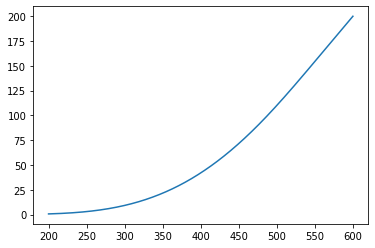

In [ ]:
strike_price = 400
option_prices = []

for i in range(200, 1001):
  time = (1001 - i)/365
  option_prices.append(bs_call(df['close'][i], strike_price, time, risk_free_rate, 0.2))

plt.plot(df['close'][200:], option_prices)

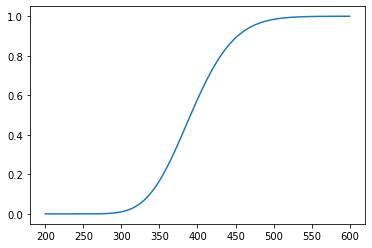

In [ ]:
strike_price = 400
delta = []

for i in range(200, 1001):
  #time = (1001 - i)/365
  delta.append(call_delta(df['close'][i], strike_price, 120/365, risk_free_rate, 0.2))

plt.plot(df['close'][200:], delta)

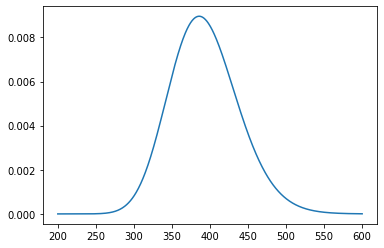

In [ ]:
strike_price = 400
gamma = []

for i in range(200, 1001):
  time = (1001 - i)/365
  gamma.append(call_gamma(df['close'][i], strike_price, 120/365, risk_free_rate, 0.2))

plt.plot(df['close'][200:], gamma)

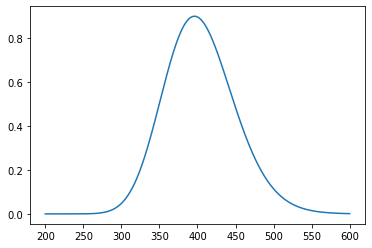

In [ ]:
strike_price = 400
vega = []

for i in range(200, 1001):
  time = (1001 - i)/365
  vega.append(call_vega(df['close'][i], strike_price, 120/365, risk_free_rate, 0.2))

plt.plot(df['close'][200:], vega)

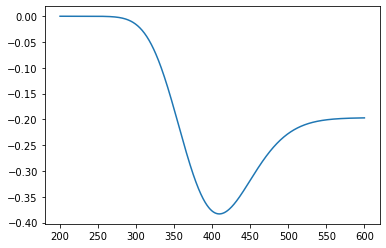

In [ ]:
strike_price = 400
theta = []

for i in range(200, 1001):
  time = (1001 - i)/365
  theta.append(call_theta(df['close'][i], strike_price, 120/365, risk_free_rate, 0.2))

plt.plot(df['close'][200:], theta)

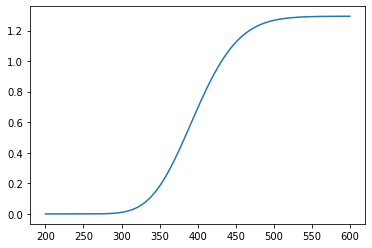

In [ ]:
strike_price = 400
rho = []

for i in range(200, 1001):
  time = (1001 - i)/365
  rho.append(call_rho(df['close'][i], strike_price, 120/365, risk_free_rate, 0.2))

plt.plot(df['close'][200:], rho)

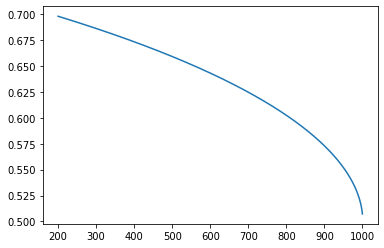

In [ ]:
strike_price = 400
delta = []

for i in range(200, 1001):
  time = (1001 - i)/365
  delta.append(call_delta(400, strike_price, time, risk_free_rate, 0.2))

plt.plot(range(200, 1001), delta)

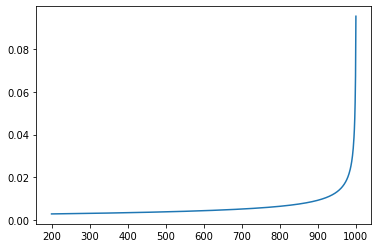

In [ ]:
strike_price = 400
gamma = []

for i in range(200, 1001):
  time = (1001 - i)/365
  gamma.append(call_gamma(400, strike_price, time, risk_free_rate, 0.2))

plt.plot(range(200, 1001), gamma)

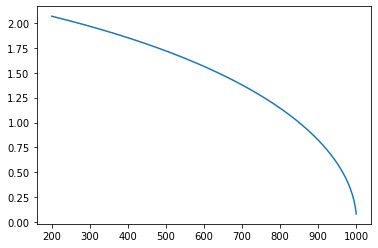

In [ ]:
strike_price = 400
vega = []

for i in range(200, 1001):
  #time = (1001 - i)/365
  vega.append(call_vega(400, strike_price, time, risk_free_rate, 0.2))

plt.plot(range(200, 1001), vega)

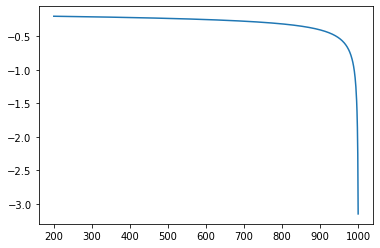

In [ ]:
strike_price = 400
theta = []

for i in range(200, 1001):
  time = (1001 - i)/365
  theta.append(call_theta(400, strike_price, time, risk_free_rate, 0.2))

plt.plot(range(200, 1001), theta)

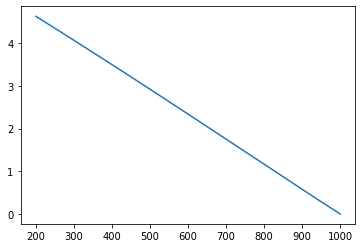

In [ ]:
strike_price = 400
rho = []

for i in range(200, 1001):
  time = (1001 - i)/365
  rho.append(call_rho(400, strike_price, time, risk_free_rate, 0.2))

plt.plot(range(200, 1001), rho)

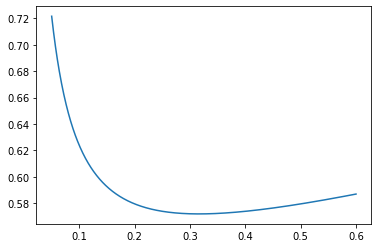

In [ ]:
strike_price = 400
delta = []

for i in range(801):
  volatility = vol[i]
  delta.append(call_delta(400, strike_price, 120/365, risk_free_rate, volatility))

plt.plot(vol, delta)

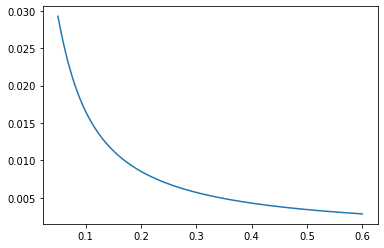

In [ ]:
strike_price = 400
gamma = []

for i in range(801):
  volatility = vol[i]
  gamma.append(call_gamma(400, strike_price, 120/365, risk_free_rate, volatility))

plt.plot(vol, gamma)

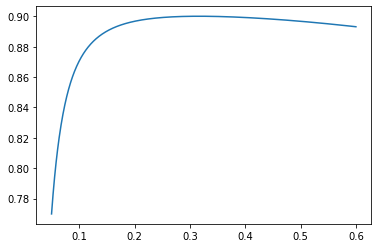

In [ ]:
strike_price = 400
vega = []

for i in range(801):
  volatility = vol[i]
  vega.append(call_vega(400, strike_price, 120/365, risk_free_rate, volatility))

plt.plot(vol, vega)

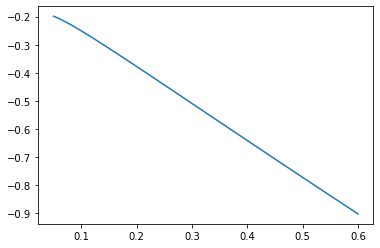

In [ ]:
strike_price = 400
theta = []

for i in range(801):
  volatility = vol[i]
  theta.append(call_theta(400, strike_price, 120/365, risk_free_rate, volatility))

plt.plot(vol, theta)

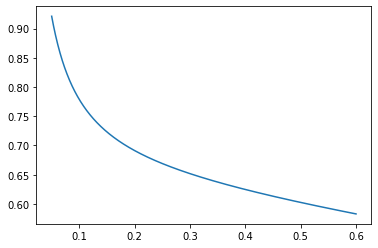

In [ ]:
strike_price = 400
rho = []

for i in range(801):
  volatility = vol[i]
  rho.append(call_rho(400, strike_price, 120/365, risk_free_rate, volatility))

plt.plot(vol, rho)